# Clustering Yelp Restaurants

**Part 1: To be completed INDIVIDUALLY and due on October 14 at 7pm.**

In this assignment, we will be working with the [Yelp dataset](https://drive.google.com/open?id=0B4bdB5WPHGsqcmJMNmxzQmQ3aTQ). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

From the Business Objects, let's try to find culinary districts in Las Vegas. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" to cluster for similarity. You may want to use only a subset (15-20) of popular categories.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling.

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Explain your data representation and how you determined certain parameters (for example, the number of clusters in k-means++). **(30 pts)**

In [4]:
import json
data = []
for line in open('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json', 'r'):
    data.append(json.loads(line))

In [9]:
from pandas import DataFrame
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scale =  MinMaxScaler()
df = DataFrame(data)
df = df[df['city'] == 'Las Vegas'][['categories', 'latitude', 'longitude']]
df['categories'] = df['categories'].apply(lambda x: ', '.join(x))
df = df[df['categories'].str.contains('restaurant', case = False)]
df_similarity = df['categories']
df_closeness = df[['latitude', 'longitude']]
df_closeness = DataFrame(scale.fit_transform(df_closeness.as_matrix()))

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vec = TfidfVectorizer(min_df = 0.01, max_df = 0.5)
m = vec.fit_transform(df_similarity)
df_feature = DataFrame(m.toarray())
df_feature = DataFrame(scale.fit_transform(df_feature.as_matrix()))
df_feature[['latitude', 'longitude']] = df_closeness
#First 46 columns are vectorized categorical information, last two columns are location information
df_feature

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,latitude,longitude
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.620343,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.732226,0.000000,0.606763,0.166625
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.675506,0.727908
2,0.545677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.527499,...,0.000000,0.000000,0.000000,0.0,0.630154,0.000000,0.000000,0.000000,0.617223,0.465862
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.428256,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.122306,0.661130
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.420413,0.448541
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.819575,0.000000,0.000000,0.421201,0.460388
6,0.595946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.467281,0.422389
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.474605,0.475950
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.432599,0.427025
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.418962,0.453652


In [ ]:
# adjust the scale for closeness and similarity, but it turns out that 
# little difference was made after trying several scaler
def scale_dataframe(df, a):
    df_sparse = df.ix[:,:,-2]
    df_new = df.ix[:,-2,:].apply(lambda x:a*x)
    return pd.concat([df_sparse,df_new],axis=1)


In [ ]:
def get_cluster(cluster, df):
    d={}
    i=0
    cluster=cluster.tolist()
    while i<len(cluster):
        if cluster[i] in d:
            d[cluster[i]].append(df.loc[i,].values)
        else:
            d[cluster[i]] =[]
            d[cluster[i]].append(df.loc[i,].values)
        i +=1
    return d

In [ ]:
from scipy.spatical.distance import euclidean as euc
def get_center(single_cluster):
    i=0
    result =[]
    d=51
    while i<d:
        result.append(sum([single_cluster[x][i] for x in range(len(single_cluster[i]))])/len(single_cluster[i]))
    return result

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as mcs
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0
    s[1] = 1
    for k in range(2,max_clusters+1):
        kmeans=KMeans(init='k-means++',n_clusters=k,n_init=10)
        kmeans.fit_predict(X)
        s[k] = mcs.silhouette_score(X,kmeans.labels_,metric='cosine')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Adjusted Rand Index')
    plt.show()

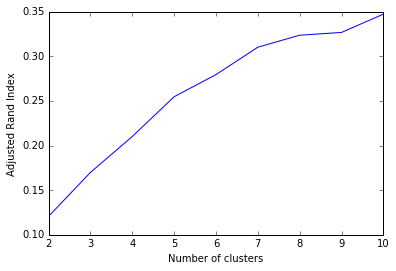

In [47]:
sc_evaluate_clusters(df_feature,10)

In [48]:
k=7
kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
keans_cluster=kmeans.fit_predict(df_feature,1.5)

In [ ]:
# hierarchical clustering. use ward distance after tried many options
# since it gives less chains and less suspectible with outliers
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_feature, 'ward')

Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned. **(10 pts)**

Note that some categories are inherently more common (e.g. "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

Now let's detect outliers. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(10 pts)**

Give a detailed analysis comparing the results you obtained from the 3 techniques. **(10 pts)**

----------